# Boilerplate functions

## Make sure that tensorflow works

In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16419988838302741429
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1248516779208301005
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 216594188252941429
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7502171341
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1929219586051859060
physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import imshow

import tensorflow as tf
import re
import numpy as np
import Image
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pylab
from matplotlib.ticker import MaxNLocator

import pickle
%matplotlib inline

In [4]:
import tensorflow as tf
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

with tf.Session() as sess:
    print (sess.run(c))

[[ 22.  28.]
 [ 49.  64.]]


In [5]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))


[[ 22.  28.]
 [ 49.  64.]]


## Import Keras

In [3]:
from keras import backend as k
from keras.layers import Activation
from keras.layers import Input, Dense, Lambda, Dropout, Convolution2D, MaxPooling2D, Flatten,Conv2D
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential


Using TensorFlow backend.


# Let's read the data

In [4]:
train_file = loadmat('../STL10/stl10_matlab/train.mat')
test_file = loadmat('../STL10/stl10_matlab/test.mat')

print("Train File :" ,train_file.keys())
print("Test File :",test_file.keys())

('Train File :', ['__header__', '__globals__', 'fold_indices', 'y', 'X', '__version__', 'class_names'])
('Test File :', ['__header__', '__globals__', 'y', 'X', '__version__', 'class_names'])


## Get the train and test images

In [ ]:
# # train_images = train_file['X'] #5000 training images ((5000, 27648))
# test_images = test_file['X'] #8000 test images ((8000, 27648))
# print(test_images.shape)

### The images need to be reshaped for VGG

In [ ]:
train_images_reshaped = np.transpose(np.reshape(train_images,(-1,3,96,96)),(0,3,2,1))
#-1 lets numpy determine the size on its own
test_images_reshaped = np.transpose(np.reshape(test_images,(-1,3,96,96)),(0,3,2,1))

print(train_images_reshaped.shape)
print(test_images_reshaped.shape)

print(train_images_reshaped[5].shape) #images is 96x96 with 3 colored channels
imshow(train_images_reshaped[5])
plt.show()
imshow(test_images_reshaped[5])

In [ ]:
del train_images,test_images

In [ ]:
#splitting the test image set because it causes memory errors during pre-processing
test_images_reshaped_1 = test_images_reshaped[:4000]
test_images_reshaped_2 = test_images_reshaped[4000:]
del test_images_reshaped

In [ ]:
imshow(train_images_reshaped[5])
plt.show()
imshow(test_images_reshaped_1[5])

## Resize the images

In [ ]:
import os, sys, tarfile, time
from PIL import Image

def resize_tensorimages(X_raw, interp_method=Image.BICUBIC):
    # VGG16 accepts input images of size (224, 224, 3)
    # Therefore, convert X_train_raw and X_test_raw to PIL.Image format, 
    # then resize the images from (96, 96, 3) to (224, 224, 3) 
    
    # X_224 = np.zeros((X_raw.shape[0], 224, 224, 3)) --this takes up too much RAM
    X_224 = [] #creates a list
    for i, _ in enumerate(X_raw):
        im = Image.fromarray(np.uint8(X_raw[i]))
        img = im.resize((224, 224), interp_method)
        arr = np.array(img)
        X_224.append(arr)
    
    return np.asarray(X_224)

In [ ]:
# X_train  = resize_tensorimages(train_images_reshaped)
# del train_images_reshaped

In [ ]:
# X_test_1 = resize_tensorimages(test_images_reshaped_1)
# del test_images_reshaped_1

In [ ]:
# X_test_2 = resize_tensorimages(test_images_reshaped_2)
# del test_images_reshaped_2

### Import the VGG Model

In [9]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
#---------------------------------------------------------

model_bottom = VGG16(include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


#### Preprocess training images for VGG

In [ ]:
X_train = preprocess_input(X_train)

In [ ]:
d = model_bottom.predict(X_train[0:2])

In [62]:
print type(d)
print d.shape
print type(d.shape[1])

<type 'numpy.ndarray'>
(2, 7, 7, 512)
<type 'int'>


In [63]:
X_train_features = np.zeros((X_train.shape[0],d.shape[1],d.shape[2],d.shape[3]))

In [100]:

from __future__ import division
batch_size = 128

for i in range(len(X_train)//batch_size):
    idx = range(i*batch_size, (i+1)*batch_size)
    print('Training set: %5.2f%%' % ((i+1)/(len(X_train)/batch_size)*100))
    X_train_features[idx] = model_bottom.predict(X_train[idx])    
X_train_features[(i+1)*batch_size:] = model_bottom.predict(X_train[(i+1)*batch_size:])

Training set:  2.56%
Training set:  5.12%
Training set:  7.68%
Training set: 10.24%
Training set: 12.80%
Training set: 15.36%
Training set: 17.92%
Training set: 20.48%
Training set: 23.04%
Training set: 25.60%
Training set: 28.16%
Training set: 30.72%
Training set: 33.28%
Training set: 35.84%
Training set: 38.40%
Training set: 40.96%
Training set: 43.52%
Training set: 46.08%
Training set: 48.64%
Training set: 51.20%
Training set: 53.76%
Training set: 56.32%
Training set: 58.88%
Training set: 61.44%
Training set: 64.00%
Training set: 66.56%
Training set: 69.12%
Training set: 71.68%
Training set: 74.24%
Training set: 76.80%
Training set: 79.36%
Training set: 81.92%
Training set: 84.48%
Training set: 87.04%
Training set: 89.60%
Training set: 92.16%
Training set: 94.72%
Training set: 97.28%
Training set: 99.84%


In [106]:
np.save('../STL10/data/X_train_features',X_train_features)
del X_train_features

#### Preprocessing test images for VGG

In [35]:
X_test_1 = preprocess_input(X_test_1)
X_test_2 = preprocess_input(X_test_2)

In [37]:
X_test_features_1 = np.zeros((X_test_1.shape[0],7,7,512))
X_test_features_2 = np.zeros((X_test_2.shape[0],7,7,512))

In [38]:
from __future__ import division
batch_size = 128

for i in range(len(X_test_1)//batch_size):
    idx = range(i*batch_size, (i+1)*batch_size)
    print('Test set 1: %5.2f%%' % ((i+1)/(len(X_test_1)/batch_size)*100))
    X_test_features_1[idx] = model_bottom.predict(X_test_1[idx])    
X_test_features_1[(i+1)*batch_size:] = model_bottom.predict(X_test_1[(i+1)*batch_size:])

Test set 1:  3.20%
Test set 1:  6.40%
Test set 1:  9.60%
Test set 1: 12.80%
Test set 1: 16.00%
Test set 1: 19.20%
Test set 1: 22.40%
Test set 1: 25.60%
Test set 1: 28.80%
Test set 1: 32.00%
Test set 1: 35.20%
Test set 1: 38.40%
Test set 1: 41.60%
Test set 1: 44.80%
Test set 1: 48.00%
Test set 1: 51.20%
Test set 1: 54.40%
Test set 1: 57.60%
Test set 1: 60.80%
Test set 1: 64.00%
Test set 1: 67.20%
Test set 1: 70.40%
Test set 1: 73.60%
Test set 1: 76.80%
Test set 1: 80.00%
Test set 1: 83.20%
Test set 1: 86.40%
Test set 1: 89.60%
Test set 1: 92.80%
Test set 1: 96.00%
Test set 1: 99.20%


In [40]:
np.save('../STL10/data/X_test_features_1',X_test_features_1)
del X_test_features_1

In [43]:
from __future__ import division
batch_size = 128

for i in range(len(X_test_2)//batch_size):
    idx = range(i*batch_size, (i+1)*batch_size)
    print('Test set 2: %5.2f%%' % ((i+1)/(len(X_test_2)/batch_size)*100))
    X_test_features_2[idx] = model_bottom.predict(X_test_2[idx])    
X_test_features_2[(i+1)*batch_size:] = model_bottom.predict(X_test_2[(i+1)*batch_size:])

Test set 2:  3.20%
Test set 2:  6.40%
Test set 2:  9.60%
Test set 2: 12.80%
Test set 2: 16.00%
Test set 2: 19.20%
Test set 2: 22.40%
Test set 2: 25.60%
Test set 2: 28.80%
Test set 2: 32.00%
Test set 2: 35.20%
Test set 2: 38.40%
Test set 2: 41.60%
Test set 2: 44.80%
Test set 2: 48.00%
Test set 2: 51.20%
Test set 2: 54.40%
Test set 2: 57.60%
Test set 2: 60.80%
Test set 2: 64.00%
Test set 2: 67.20%
Test set 2: 70.40%
Test set 2: 73.60%
Test set 2: 76.80%
Test set 2: 80.00%
Test set 2: 83.20%
Test set 2: 86.40%
Test set 2: 89.60%
Test set 2: 92.80%
Test set 2: 96.00%
Test set 2: 99.20%


In [44]:
np.save('../STL10/data/X_test_features_2',X_test_features_2)
del X_test_features_2

## Get the train and test labels

In [5]:
train_labels = train_file['y']
test_labels = test_file['y']
class_labels = test_file['class_names']
# print(train_labels.shape) #5000 labels for 5000 images ((5000,1))
# print(min(train_labels),max(train_labels)) #class labels go from 1-10.


#Let's re-adjust the labels to be from 0 to 9
train_labels_adjusted = train_labels - 1
test_labels_adjusted = test_labels - 1
# print(min(train_labels_adjusted),max(train_labels_adjusted)) #Class labels adjuested goes from 0 to 9


In [6]:
del train_file,test_file
del train_labels, test_labels

In [10]:
print type(class_labels)

<type 'numpy.ndarray'>


In [11]:
print np.asarray(class_labels)

[[array([u'airplane'],
      dtype='<U8')
  array([u'bird'],
      dtype='<U4') array([u'car'],
      dtype='<U3')
  array([u'cat'],
      dtype='<U3') array([u'deer'],
      dtype='<U4')
  array([u'dog'],
      dtype='<U3') array([u'horse'],
      dtype='<U5')
  array([u'monkey'],
      dtype='<U6') array([u'ship'],
      dtype='<U4')
  array([u'truck'],
      dtype='<U5')]]


In [7]:
y_train = to_categorical(train_labels_adjusted, num_classes = 1000)
y_test  = to_categorical(test_labels_adjusted , num_classes = 1000)

In [8]:
del train_labels_adjusted, test_labels_adjusted

In [14]:
print(y_train.shape)#remember this was 5000x1 earlier and to categorical changed this to one-hot encoding

(5000, 1000)


## Printing stuff to learn

In [16]:
# y_train[0][:100]
# y_temp = np.argmax(y_train,axis = 1)
# print(y_train[1][:100]) #5th index is 1
# print(y_temp[1])# this will store the index 5 after argmax

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
5


In [27]:
# # print(set(y_temp)) #there are 10 classes in our dataset
# idx = []
# for cls in set(y_temp):
#     idx.append(np.where(y_temp==cls)[0])
# print(type(idx))#list
# print(len(idx))#list of 10 classes
# print(type(idx[0]))#each list element is an array
# print(len(idx[0]))# each class has 500 numbers
# idx = np.asarray(idx)
# print(idx.shape)#convert to 10x500 array


<type 'list'>
10
<type 'numpy.ndarray'>
500
(10, 500)


# Write helper functions

In [9]:
def custom_KFold(y_onehot, n_split=5):
    y = np.argmax(y_onehot, axis=1)
    #axis 1 looks at all columns within the row
    #so for each image we get the max index
    # input y: numpy array of class ID's
    
    idx = []
    for cls in set(y):
        # idx[cls] is the indices to class no cls
        # Idx will store indices where each class label is true
        # so 1st 500 idx will have indices where class label is 0, next 500 will be for class label 1 and so on
        idx.append(np.where(y==cls)[0])
        
    idx = np.asarray(idx)
    for i in range(len(idx)):#will go from 0 to 9 for 10 classes
        np.random.shuffle(idx[i]) #shuffle the images within each class

    fidx = []
    fold_width = int(idx.shape[1]/n_split)# no. of images per class divided by number of folds
    
    for k in range(n_split):
        out = []
        
        #get kth fold for each class
        for i in range(len(idx)):#loops 10 times *same as number of class*
            out.append(idx[i,k*fold_width : (k+1)*fold_width])
        
        #combine the kth fold of 10 classes and shuffle it
        out = np.concatenate(out)
        np.random.shuffle(out)
        
        #store the the kth fold in fidx
        fidx.append(out)
    
    fidx = np.array(fidx)
    np.random.shuffle(fidx)
    return fidx

In [10]:
def get_cnames_fidx(y_onehot, n_split=5):
    # Returns
    # fidx: fold indices on the training set (0,...4999)
    # cnames: class names (10 classes)
    
    cnames = class_labels

    fidx = custom_KFold(y_onehot, n_split=n_split)
    
    print('Class names retrieved in cnames')
    print('K-Fold indices generated, n_split = %i'%(n_split))
    print('Fold width = %i'%(fidx.shape[1]))
    print('Number of data points for each class = %i'%(fidx.shape[1]/n_split))
    return cnames, fidx

In [11]:
cnames, fidx = get_cnames_fidx(y_train, n_split=5)
print('All labeled data loaded.')

Class names retrieved in cnames
K-Fold indices generated, n_split = 5
Fold width = 1000
Number of data points for each class = 200
All labeled data loaded.


In [12]:
X_test_features1 = np.load('../STL10/data/X_test_features_1.npy')
X_test_features2 = np.load('../STL10/data/X_test_features_2.npy')

In [13]:
X_test_features =  np.concatenate([X_test_features1,X_test_features2])
del X_test_features1,X_test_features2

In [15]:
X_train_features = np.load('../STL10/data/X_train_features.npy')

In [16]:
X_all = np.concatenate([X_train_features,X_test_features])
del X_train_features,X_test_features

y_all = np.concatenate([y_train, y_test])
del y_train,y_test

idx = list(range(13000))
np.random.shuffle(idx)

X_train_features = X_all[idx[:5000]]
X_test_features = X_all[idx[5000:]]
del X_all

y_train = y_all[idx[:5000]]
y_test = y_all[idx[5000:]]
del y_all


In [14]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('X_test_features', 1605632144),
 ('fidx', 40112),
 ('Activation', 904),
 ('Callback', 904),
 ('Conv2D', 904),
 ('Convolution2D', 904),
 ('Dense', 904),
 ('Dropout', 904),
 ('Flatten', 904),
 ('GlobalAveragePooling2D', 904),
 ('Lambda', 904),
 ('MaxNLocator', 904),
 ('MaxPooling2D', 904),
 ('Model', 904),
 ('RMSprop', 904),
 ('Sequential', 904),
 ('Input', 120),
 ('custom_KFold', 120),
 ('get_cnames_fidx', 120),
 ('imshow', 120),
 ('loadmat', 120),
 ('to_categorical', 120),
 ('train_test_split', 120),
 ('class_labels', 112),
 ('cnames', 112),
 ('y_test', 112),
 ('y_train', 112),
 ('sess', 64),
 ('device_lib', 56),
 ('k', 56),
 ('np', 56),
 ('plt', 56),
 ('pylab', 56),
 ('tf', 56)]

In [17]:
def construct_model():
    from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
    from keras.layers import Dropout, Flatten, Dense
    from keras.models import Sequential

    model_top = Sequential() 
    model_top.add(GlobalAveragePooling2D(data_format='channels_last', input_shape=(7, 7, 512))) 
    # model_top.add(Dense(1000, activation='relu')) 
    model_top.add(Dense(1000, activation='relu')) 
    model_top.add(Dense(1000, activation='softmax')) 


    model_top.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

    return model_top

In [18]:
def plotter(xlabel=None, ylabel=None, title=None, xlim=None, ylim=None):
    fig = plt.figure()
    ax = plt.gca() # gets current axis
    fig.set_size_inches((15,5))
    plt.grid('on')
    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    if xlim: plt.xlim((0, xlim));
    if ylim: plt.ylim((0, ylim));
    if title: plt.title(title)
    return fig, ax

In [19]:
def train_model(model_top, 
                X_train, y_train,
                X_cv, y_cv,
                epochs=20,
                batch_size=128,
                wanna_plot=False,
                fpath='model'):
    
    start = time.time()
    from keras.callbacks import ModelCheckpoint  
    print('Initiate Training....')
    # ..................................................................
    
    callback_inst = Callback_Func((X_train, y_train),(X_cv, y_cv), start, wanna_plot=wanna_plot)

    checkpointer = ModelCheckpoint(filepath='../STL10/data/saved_models/' + fpath + '.best.hdf5', 
                                   verbose=1, save_best_only=True)

    model_top.fit(X_train, y_train, 
              validation_data=(X_cv, y_cv),
              epochs=epochs, 
              batch_size=batch_size, 
              callbacks=[callback_inst, checkpointer], 
              verbose=0)

    print_runtime(start)

    return model_top, callback_inst

In [20]:
from keras.callbacks import Callback
class Callback_Func(Callback):
    def __init__(self, train_data, test_data, start, wanna_plot=True):
        self.train_data = train_data
        self.test_data = test_data
        self.loss_train = []
        self.loss_test = []
        self.acc = []
        self.start = start
        self.wanna_plot = wanna_plot
        
        
    def plotter(self, title='validation accuracy'):
        ax = plt.subplot(121)
        plt.xlabel('epochs')
        plt.grid('on')
        plt.title('loss')
        x_plot = range(1, len(self.loss_train)+1)
        plt.xlim((1,max(max(x_plot),2)))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.plot(x_plot, self.loss_test, 'r--^', alpha=.7, label="validation")
        ax.plot(x_plot, self.loss_train, 'k--^', alpha=.7, label="train")
        plt.legend()

        ax = plt.subplot(122)
        plt.xlabel('epochs')
        plt.grid('on')
        ax.plot(x_plot, self.acc, 'b--^', alpha=.5)
        plt.xlim((1,max(max(x_plot),2)))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.title(title)
        plt.ion()
        plt.show()


    def on_epoch_end(self, epoch, logs={}):
        X_train, y_train = self.train_data
        X_test, y_test = self.test_data
        _loss_train, _ = self.model.evaluate(X_train, y_train, batch_size=1024, verbose=0)
        _loss_test, _acc = self.model.evaluate(X_test, y_test, batch_size=1024, verbose=0)
        self.loss_train.append(_loss_train)
        self.loss_test.append(_loss_test)
        self.acc.append(_acc)
        
        
        if self.wanna_plot: 
            self.plotter()
            end = time.time()
            print('\nRuntime: %d min %d sec' % ((end-self.start)//60, (end-self.start)%60))
        
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

In [21]:

def print_runtime(start):
    end = time.time()
    print('Runtime: %d min %d sec' % ((end-start)//60, (end-start)%60))

# train the model

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              513000    
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
Total params: 1,514,000
Trainable params: 1,514,000
Non-trainable params: 0
_________________________________________________________________
Initiate Training....
Instructions for updating:
Use tf.cast instead.

Epoch 00001: val_loss improved from inf to 0.19354, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00002: val_loss improved from 0.19354 to 0.15294, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00003: val_loss imp

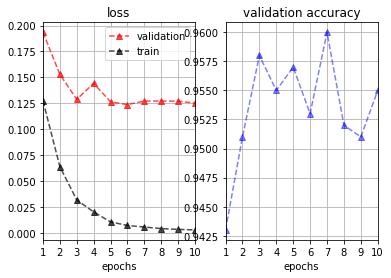

Initiate Training....

Epoch 00001: val_loss improved from inf to 0.21075, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00002: val_loss did not improve from 0.21075

Epoch 00003: val_loss improved from 0.21075 to 0.17414, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00004: val_loss improved from 0.17414 to 0.15632, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00005: val_loss did not improve from 0.15632

Epoch 00006: val_loss did not improve from 0.15632

Epoch 00007: val_loss did not improve from 0.15632

Epoch 00008: val_loss did not improve from 0.15632

Epoch 00009: val_loss did not improve from 0.15632

Epoch 00010: val_loss did not improve from 0.15632
Runtime: 0 min 11 sec
8000/8000 [==============================] - 1s 95us/step

At k = 1, 
Test Accuracy = 94.65 %


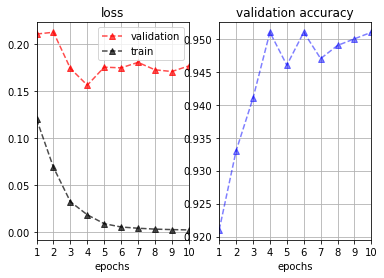

Initiate Training....

Epoch 00001: val_loss improved from inf to 0.21290, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00002: val_loss improved from 0.21290 to 0.16442, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00003: val_loss improved from 0.16442 to 0.16074, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00004: val_loss did not improve from 0.16074

Epoch 00005: val_loss improved from 0.16074 to 0.15033, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00006: val_loss did not improve from 0.15033

Epoch 00007: val_loss did not improve from 0.15033

Epoch 00008: val_loss did not improve from 0.15033

Epoch 00009: val_loss did not improve from 0.15033

Epoch 00010: val_loss did not improve from 0.15033
Runtime: 0 min 11 sec
8000/8000 [==============================] - 1s 91us/step

At k = 2, 
Test Accuracy = 94.79 %


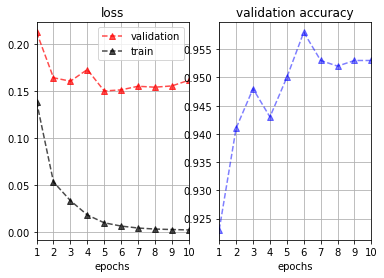

Initiate Training....

Epoch 00001: val_loss improved from inf to 0.20649, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00002: val_loss did not improve from 0.20649

Epoch 00003: val_loss improved from 0.20649 to 0.19698, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00004: val_loss improved from 0.19698 to 0.18099, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00005: val_loss improved from 0.18099 to 0.15065, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00006: val_loss did not improve from 0.15065

Epoch 00007: val_loss did not improve from 0.15065

Epoch 00008: val_loss did not improve from 0.15065

Epoch 00009: val_loss did not improve from 0.15065

Epoch 00010: val_loss did not improve from 0.15065
Runtime: 0 min 11 sec
8000/8000 [==============================] - 1s 89us/step

At k = 3, 
Test Accuracy = 94.74 %


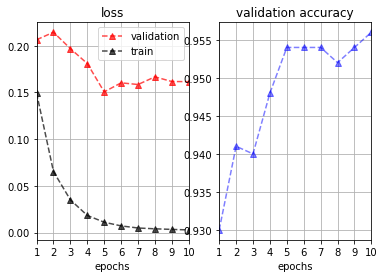

Initiate Training....

Epoch 00001: val_loss improved from inf to 0.27595, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00002: val_loss improved from 0.27595 to 0.21320, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00003: val_loss did not improve from 0.21320

Epoch 00004: val_loss improved from 0.21320 to 0.20768, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00005: val_loss improved from 0.20768 to 0.20328, saving model to ../STL10/data/saved_models/model.best.hdf5

Epoch 00006: val_loss did not improve from 0.20328

Epoch 00007: val_loss did not improve from 0.20328

Epoch 00008: val_loss did not improve from 0.20328

Epoch 00009: val_loss did not improve from 0.20328

Epoch 00010: val_loss did not improve from 0.20328
Runtime: 0 min 11 sec
8000/8000 [==============================] - 1s 87us/step

At k = 4, 
Test Accuracy = 94.83 %


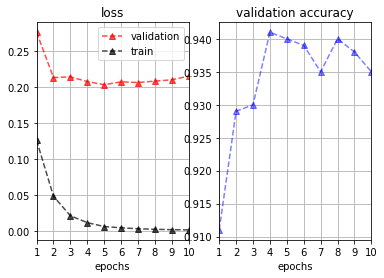

In [22]:
start = time.time()
acc = []

# ### Do a 5 k-fold
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5, shuffle=True)
# for fidx_train, fidx_cv in kf.split(train_labels_adjusted):
    
    
for k, _ in enumerate(fidx):
    fidx_cv = fidx[k]
    fidx_train = np.concatenate([fidx[0:k],fidx[k+1:]]).flatten()
    
    X_cv_features_1k = X_train_features[fidx_cv]
    y_cv_1k = y_train[fidx_cv]
    
    X_train_features_9k = X_train_features[fidx_train]
    y_train_9k = y_train[fidx_train]
    
    
    model_top = construct_model()
    if k == 0: model_top.summary()
        
    model_top, callback_inst = train_model(model_top, 
                                           X_train_features_9k, y_train_9k,
                                           X_cv_features_1k, y_cv_1k, 
                                           epochs=10,
                                           batch_size=128,
                                           wanna_plot=False)
    
    model_top.load_weights('../STL10/data/saved_models/model.best.hdf5')
    _loss, _acc = model_top.evaluate(X_test_features, y_test,batch_size=128);
    
    acc.append(_acc)
    print('\nAt k = %i, \nTest Accuracy = %.2f %%' % (k, _acc*100))

    ### Plot loss function and accuracy
    callback_inst.plotter()


    
    
#     ### 7.  Compute test accuracy.

#     _loss, _acc = model_top.evaluate(X_test_features, y_test, 
#                                     batch_size=128);
#     acc.append(_acc)
#     print('\nAt k = %i, \nTest Accuracy = %.2f %%' % (k, _acc*100))

#     ### Plot loss function and accuracy
#     callback_inst.plotter()
    


In [119]:

print(('\n' + ('\n'+'-'*30)*2 +'\nIn %i Folds'+ '\nK-Fold Average Test Accuracy = %.2f %%  <==') % 
      (len(fidx), np.mean(acc)*100))
print_runtime(start)



------------------------------
------------------------------
In 5 Folds
K-Fold Average Test Accuracy = nan %  <==
Runtime: 1 min 18 sec


/home/aishwarya105/anaconda3/envs/my-test-env/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/aishwarya105/anaconda3/envs/my-test-env/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
